
--- Clustering: Iris Dataset with KMeans & Hierarchical ---


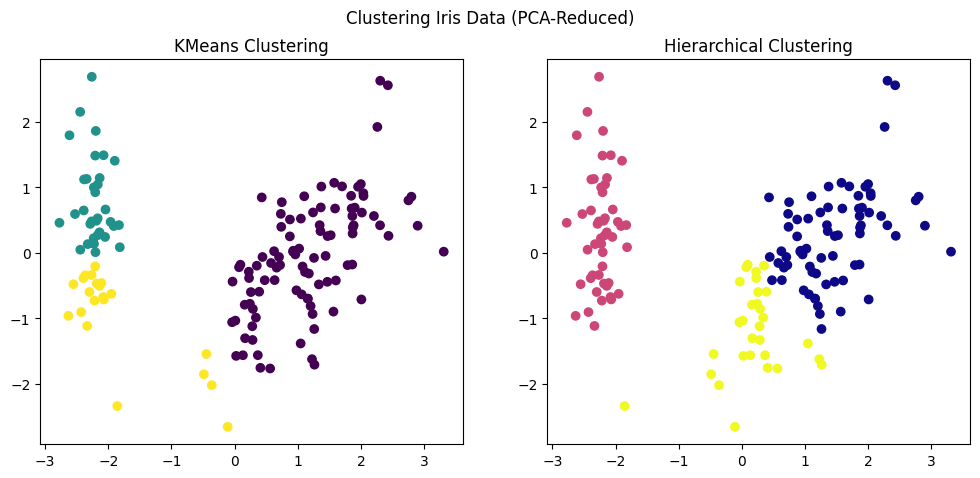


--- Dimensionality Reduction: Digits Dataset with PCA & t-SNE ---


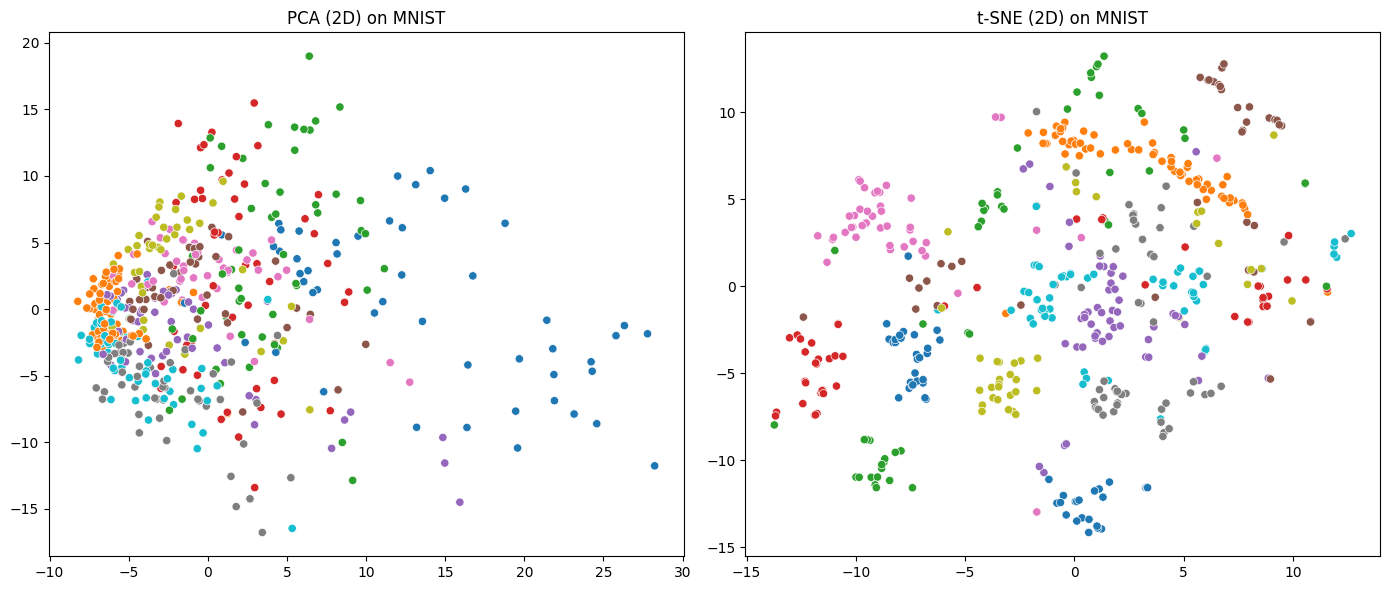


--- Anomaly Detection: Simulated Credit Card Spending ---


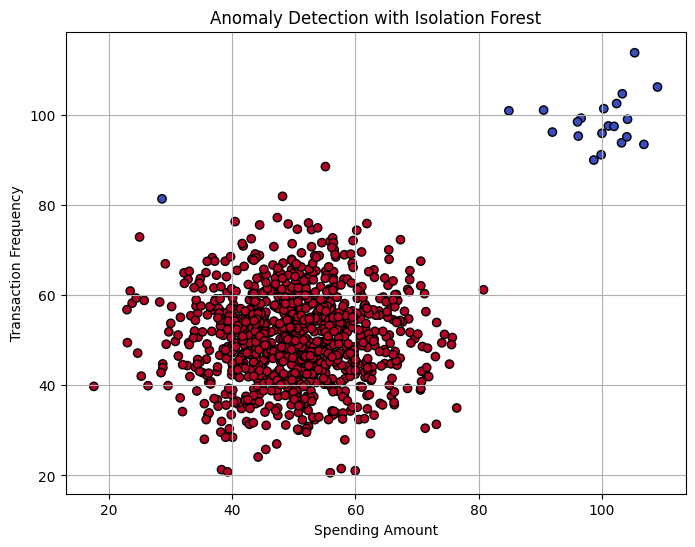


--- Association Rule Mining: Market Basket Example ---
Frequent Itemsets:
    support         itemsets
0      0.6           (milk)
1      0.8          (bread)
2      0.6         (butter)
3      0.4            (jam)
4      0.4    (milk, bread)
5      0.4   (butter, milk)
6      0.4  (butter, bread)

Association Rules:
   antecedents consequents  support  confidence      lift
0    (butter)      (milk)      0.4    0.666667  1.111111
1      (milk)    (butter)      0.4    0.666667  1.111111


In [ ]:
# Title: Unsupervised Learning

# Task 1: Identifying patterns in customer purchasing behavior without any predefined categories.
# Task 2: Grouping news articles by topic without knowing what the topics are.
# Task 3:  Analyzing satellite images to identify different land use types without labeled data.



# Title: Difference Between Supervised & Unsupervised Learning

# Task 1:  Supervised Learning - Predicting house prices based on historical labeled data (e.g., size, location).
# Task 2:  Unsupervised Learning - Exploring the hidden demographics within a dataset of customerprofiles.
# Task 3:  Supervised Learning - Classifying emails as spam or not spam using labeled examples.
# Task 4:  Unsupervised Learning -  Grouping images of handwritten digits without knowing the digit labels.



# Title: Real-World Applications of Unsupervised Learning

# Customer Segmentation
# Task 1: Segmenting retail customers based on purchasing patterns.
# Task 2: Dividing social media users into groups based on engagement metrics.
# Task 3: Grouping telecom users by usage patterns to offer personalized plans.

# Anomoly Detection
# Task 1: Detecting fraudulent credit card transactions by identifying deviations from normal spending patterns.
# Task 2: Identifying unusual network activity indicating potential cybersecurity threats.
# Task 3: Monitoring industrial equipment for signs of failure by detecting abnormal operating conditions.

# Feature Reduction
# Task 1:  Using Principal Component Analysis (PCA) to reduce the dimensionality of image datasets for faster processing.
# Task 2: Applying feature reduction to sensor data in IoT devices to improve computational efficiency.
# Task 3:  Simplifying marketing datasets by merging related variables to uncover essential factors driving customer behavior.




# Title:  Types of Unsupervised Learning

# Clustering
# Task 1; Using K-means clustering to group customers into segments with similar purchasing behaviors.
# Task 2:  Applying hierarchical clustering to organize species based on genetic similarities.
# Task 3: Clustering web pages based on content similarity for improved search engine performance.
    
# Dimensionality Reduction
# Task 1: Applying PCA to reduce features in a facial recognition dataset.
# Task 2: Using t-SNE for visualizing high-dimensional data in a 2D plot.
# Task 3:  Employing Linear Discriminant Analysis to reduce variables in stock market prediction datasets.

# Association Rule Learning
# Task 1: Identifying products frequently bought together in market basket analysis.
# Task 2: Uncovering relationships between medical symptoms and diseases in healthcare data.
# Task 3: Finding associations between ingredients in cooking recipes.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')


# -------------------- Clustering --------------------
def clustering_tasks():
    print("\n--- Clustering: Iris Dataset with KMeans & Hierarchical ---")
    iris = load_iris()
    X = iris.data
    y = iris.target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    km_labels = kmeans.fit_predict(X_scaled)
    hierarchical = AgglomerativeClustering(n_clusters=3)
    hc_labels = hierarchical.fit_predict(X_scaled)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=km_labels, cmap='viridis')
    ax[0].set_title('KMeans Clustering')

    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='plasma')
    ax[1].set_title('Hierarchical Clustering')

    plt.suptitle("Clustering Iris Data (PCA-Reduced)")
    plt.show()


# -------------------- Dimensionality Reduction --------------------
def dimensionality_reduction_tasks():
    print("\n--- Dimensionality Reduction: Digits Dataset with PCA & t-SNE ---")

    mnist = fetch_openml("mnist_784", version=1, as_frame=False)
    X = mnist.data[:500]  
    y = mnist.target[:500].astype(int)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300, init='pca', learning_rate='auto', random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', ax=ax[0], legend=False)
    ax[0].set_title('PCA (2D) on MNIST')
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', ax=ax[1], legend=False)
    ax[1].set_title('t-SNE (2D) on MNIST')

    plt.tight_layout()
    plt.show()



# -------------------- Anomaly Detection --------------------
def anomaly_detection_task():
    print("\n--- Anomaly Detection: Simulated Credit Card Spending ---")
    np.random.seed(42)
    normal_data = np.random.normal(loc=50, scale=10, size=(1000, 2))
    anomaly_data = np.random.normal(loc=100, scale=5, size=(20, 2))
    X = np.vstack([normal_data, anomaly_data])

    model = IsolationForest(contamination=0.02, random_state=42)
    labels = model.fit_predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
    plt.title('Anomaly Detection with Isolation Forest')
    plt.xlabel('Spending Amount')
    plt.ylabel('Transaction Frequency')
    plt.grid(True)
    plt.show()


# -------------------- Association Rule Learning --------------------
def association_rule_task():
    print("\n--- Association Rule Mining: Market Basket Example ---")
    data = {
        'milk': [1, 0, 1, 1, 0],
        'bread': [1, 1, 0, 1, 1],
        'butter': [0, 1, 1, 1, 0],
        'jam': [0, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)

    frequent_items = apriori(df, min_support=0.4, use_colnames=True)
    rules = association_rules(frequent_items, metric='lift', min_threshold=1)

    print("Frequent Itemsets:\n", frequent_items)
    print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


# -------------------- MAIN --------------------
if __name__ == "__main__":
    clustering_tasks()
    dimensionality_reduction_tasks()
    anomaly_detection_task()
    association_rule_task()

